In [64]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scapy.all import *
import scapy.all

In [65]:
import commNumStartLT; from commNumStartLT import Mesure
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Modem
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Source
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Canal
importlib.reload(commNumStartLT)

<module 'commNumStartLT' from 'c:\\Users\\energ\\Code\\TP_RT3R05\\commNumStartLT.py'>

Création d'un signal QPSK 

Mapping de la séquence binaire : [ 0.47140452+0.47140452j -0.47140452+0.47140452j  0.47140452-0.47140452j
  0.47140452+0.47140452j  0.47140452+0.47140452j -0.47140452-0.47140452j
 -0.47140452+0.47140452j  0.47140452+0.47140452j  0.47140452-0.47140452j
  0.47140452+0.47140452j  0.47140452-0.47140452j -0.47140452-0.47140452j
  0.47140452+0.47140452j -0.47140452+0.47140452j -0.47140452-0.47140452j
  0.47140452+0.47140452j -0.47140452+0.47140452j  0.47140452+0.47140452j
 -0.47140452+0.47140452j -0.47140452+0.47140452j -0.47140452+0.47140452j
 -0.47140452+0.47140452j  0.47140452-0.47140452j -0.47140452+0.47140452j
  0.47140452+0.47140452j -0.47140452+0.47140452j -0.47140452+0.47140452j
 -0.47140452+0.47140452j  0.47140452-0.47140452j -0.47140452-0.47140452j
  0.47140452-0.47140452j -0.47140452+0.47140452j  0.47140452+0.47140452j
  0.47140452+0.47140452j  0.47140452-0.47140452j  0.47140452+0.47140452j
 -0.47140452+0.47140452j  0.47140452+0.47140452j  0.47140452+0.47140452j
  0.47140452+0.471

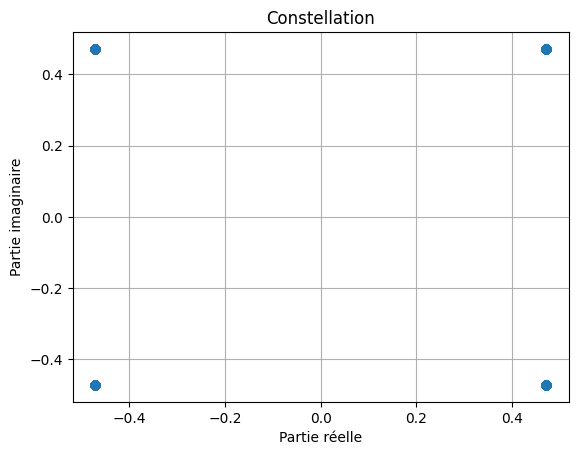

In [66]:
bits = Source.random(2000)
MyModem = Modem('PSK', 4, bits=bits)
MyMap = MyModem.mapping(np.sqrt(2), phase_origine=np.pi/4)
print("Mapping de la séquence binaire :", MyMap)
print("Le nombre de symboles est :", MyModem.nsymb)
print("Le nombre de bits est :", MyModem.bits)

# Affichage de la constellation

plt.figure()
plt.scatter(np.real(MyMap), np.imag(MyMap))
plt.title("Constellation")
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")
plt.grid()
plt.show()

# Affichage du diagramme de constellation




Calcul des paramètres

$R = 50$ bits/s
$fe = 10^3$ Hz
$f_0 = 500$ Hz 
$$ 

$$
on cherche D le débit binnaire 
$$
$$
$ D = R*\log_{2}(N) = R*2 = 100$ Bauds
$$
$$
On cherche maintenant le facteur d'upsampling :
$$
$$
upsampling = $ \frac{fe}{R} = \frac{10^3}{50} = 20 $

c:\Users\energ\Code\TP_RT3R05\TPRT3R05\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\energ\Code\TP_RT3R05\TPRT3R05\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Le signal filtré est de longueur : 200000


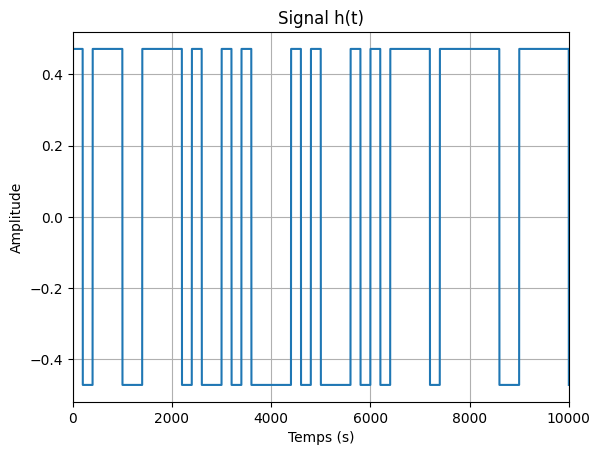

In [67]:
# Modulation QPSK
# Rapidité de modulation = 50 symboles/s
# Fréquence d’échantillonnage : 10KHz
# Fréquence porteuse : 500Hz
R = 50
fe = 10e3
f0 = 500
D = R*2
upsampling = int(fe/R)
temp_bit = 1/D

filtered = MyModem.filtre_MF(MyMap, upsampling=upsampling, filtre_type="rectangular")

# Affichage du signal filtré

plt.figure()
plt.plot(filtered)
plt.title("Signal h(t)")
plt.xlabel("Temps (s)")
plt.xlim(0, 10000)
plt.ylabel("Amplitude")

plt.grid()

print("Le signal filtré est de longueur :", len(filtered))
#Affichage des bits en print







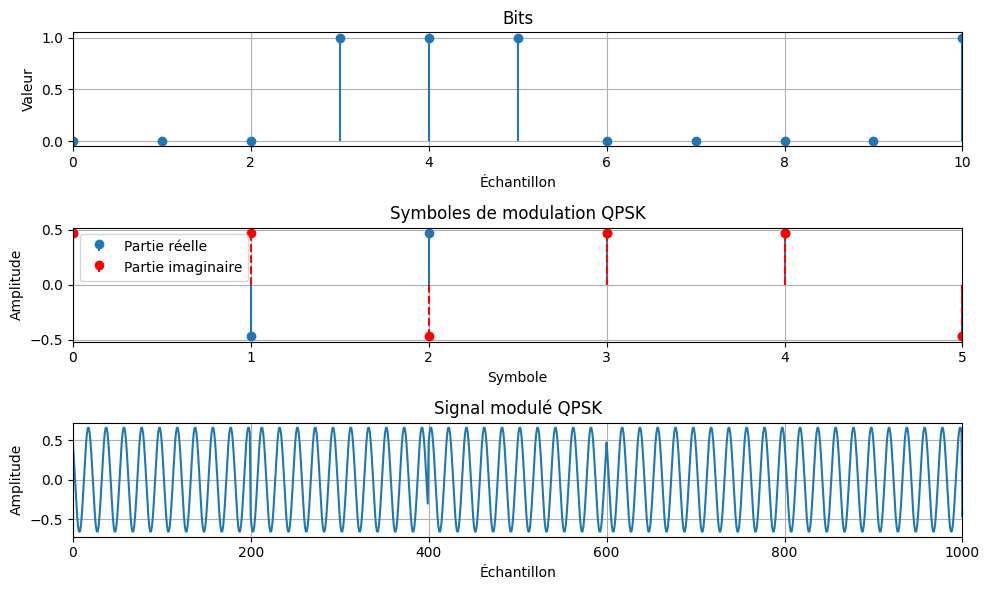

In [68]:

# Translation de fréquence
nb_symbs_aff = 5
nb_bits_aff = nb_symbs_aff * 2
nb_ech_aff = nb_symbs_aff * upsampling

translated_signal = MyModem.upconv(filtered, f0, 1/fe)

plt.figure(figsize=(10, 6))

# 1. Tracé des bits
plt.subplot(3, 1, 1)
plt.stem(bits, basefmt=" ")
plt.title("Bits")
plt.xlim(0, nb_bits_aff)
plt.xlabel("Échantillon")
plt.ylabel("Valeur")
plt.grid()


# 2. Tracé des symboles de modulation (partie réelle et imaginaire)
plt.subplot(3, 1, 2)
plt.stem(np.real(MyMap), label="Partie réelle", basefmt=" ")
plt.stem(np.imag(MyMap), label="Partie imaginaire", linefmt='r--', markerfmt='ro', basefmt=" ")
plt.title("Symboles de modulation QPSK")
plt.xlim(0, nb_symbs_aff)
plt.xlabel("Symbole")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# 3. Tracé du signal modulé QPSK
plt.subplot(3, 1, 3)
plt.plot(translated_signal)
plt.title("Signal modulé QPSK")
plt.xlim(0, nb_ech_aff)
plt.xlabel("Échantillon")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.grid()
plt.show()


## Canal AWGN

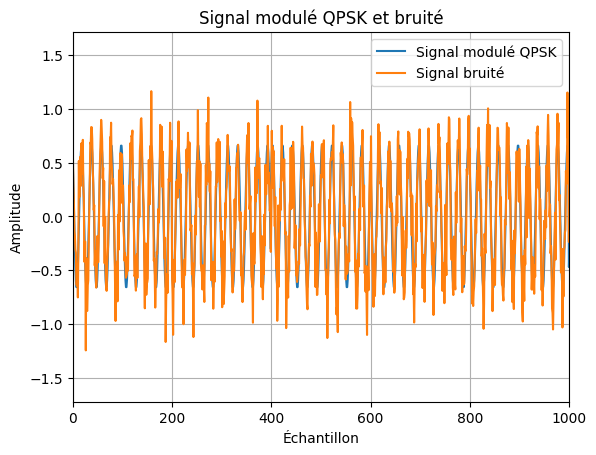

In [69]:

MyCanel = Canal.awgn(translated_signal, 0, std=0.2)

# Affichage du signal bruité et clair

plt.figure()
plt.plot(translated_signal, label="Signal modulé QPSK")
plt.plot(MyCanel, label="Signal bruité")
plt.title("Signal modulé QPSK et bruité")
plt.xlabel("Échantillon")
plt.xlim(0, nb_ech_aff)
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()






## Recepteur QPSK

In [72]:
demod_signal = MyModem.downconv(MyCanel, f0, 1/fe, symb_type='complexe')


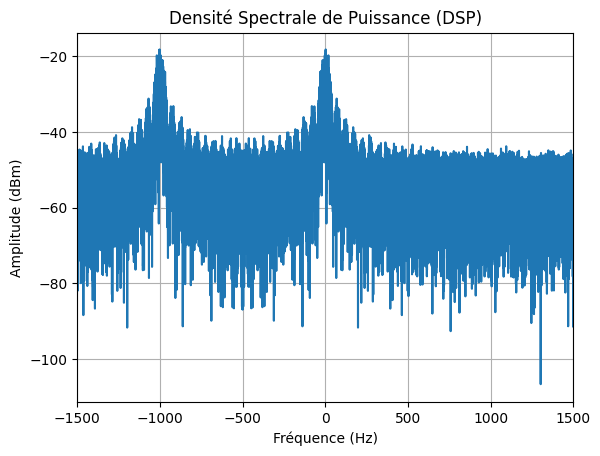

(array([-5000.  , -4999.95, -4999.9 , ...,  4999.85,  4999.9 ,  4999.95]),
 array([-58.58704474, -49.38080494, -59.28831545, ..., -50.52712737,
        -48.06267726, -52.37003114]))

In [74]:
MyMesure_of_mycanel = Mesure(MyCanel)
plt.xlim(-1500, 1500)
MyMesure_of_mycanel.DSP(fe, type="Bi", unit="dBm")

Text(0, 0.5, 'Amplitude')

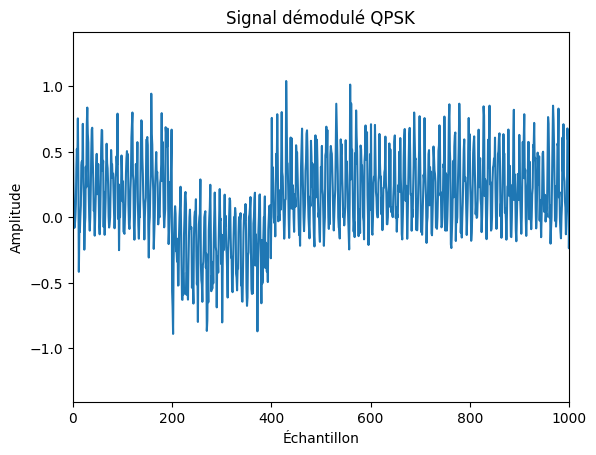

In [70]:

# Demodulation QPSK




demod_signal = MyModem.downconv(MyCanel, f0, 1/fe, symb_type='complexe')

# Affichage du signal démodulé

plt.figure()
plt.plot(demod_signal)
plt.title("Signal démodulé QPSK")
plt.xlabel("Échantillon")
plt.xlim(0, nb_ech_aff)
plt.ylabel("Amplitude")






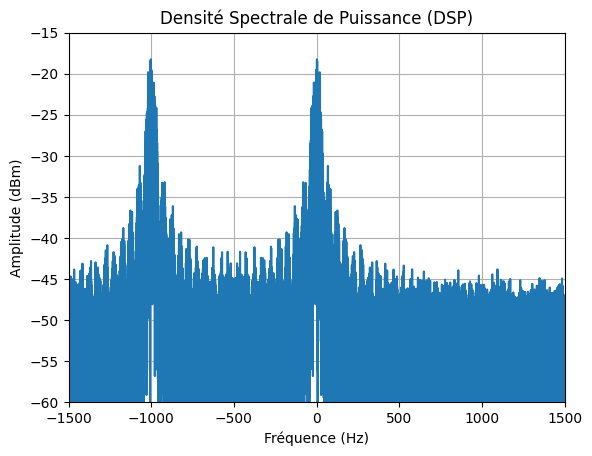

(array([-5000.  , -4999.95, -4999.9 , ...,  4999.85,  4999.9 ,  4999.95]),
 array([-58.58704474, -49.38080494, -59.28831545, ..., -50.52712737,
        -48.06267726, -52.37003114]))

In [71]:
plt.xlim(-1500, 1500)
plt.ylim(-60, -15)
MyMesure = Mesure(demod_signal)
MyMesure.DSP(fe, type="Bi", unit="dBm")
